<a href="https://colab.research.google.com/github/gn0262487838/python_ipynb_ML_text/blob/master/cluster_text_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
# 資料洗滌>>>彙整資料 by pandas
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [0]:
# 分割資料
from sklearn.model_selection import train_test_split

x_train, x_test, y_ans, y_test = train_test_split(df.drop(["target"],axis=1),df["target"],test_size=0.1)

In [127]:
# 在你已知道幾種時,k就直接選!!!
# fit
from sklearn.cluster import KMeans

clu = KMeans(n_clusters=3)
clu.fit(x_train)

# k-means++表示起始挑選點盡量遠一點。

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [128]:
# 訓練完後標籤結果。
clu.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1,
       1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2,
       2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 0], dtype=int32)

In [129]:

ru = clu.predict(x_test)
print("預測結果:", list(ru))
print("實際結果:", list(y_test))


預測結果: [1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1]
實際結果: [1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 1]


In [130]:
# 反覆取k值並訓練及評價。
from sklearn.metrics import silhouette_score # 內聚外離。
x = df.drop(["target"],axis=1)
plot_x = []
plot_y = []
for i in range(2,6):
    clu = KMeans(n_clusters=i)
    a = clu.fit(x)
    # 評價訓練結果
    s = silhouette_score(x,clu.labels_) 
    plot_x.append(i)
    plot_y.append(s)
print("K值:",plot_x)
print("score:",plot_y)

K值: [2, 3, 4, 5]
score: [0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048]


Text(0, 0.5, 'score')

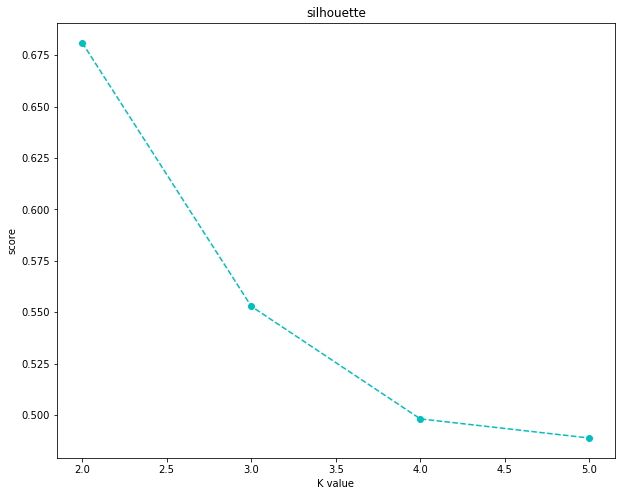

In [131]:

import matplotlib.pyplot as plt

# 此指令只能在notebook才可使用，不然都要打.show()。
%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot(plot_x, plot_y, "o--c") # 點:o , 線: -- , 顏色: c 
plt.title("silhouette")
plt.xlabel("K value")
plt.ylabel("score")
